In [20]:
import time      # for testing use only
import os         # for testing use only

from bs4 import BeautifulSoup as bs
import pandas as pd
import scipy as sc
import numpy as np
import requests
from lxml import html
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
def load_csv(file_name):
    df = pd.read_csv(file_name)
    return df

In [45]:
df = load_csv('FixData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           5913 non-null   object 
 1   Location       5883 non-null   object 
 2   Vegetarian     5914 non-null   int64  
 3   Gluten         5914 non-null   int64  
 4   FoodRating     5914 non-null   float64
 5   ServiceFood    5914 non-null   float64
 6   ValueFood      5883 non-null   float64
 7   RankingInArea  5914 non-null   object 
 8   Ratings        5914 non-null   float64
 9   CuisineCount   5914 non-null   int64  
 10  NumOfReviews   5914 non-null   object 
 11  price          5882 non-null   float64
 12  Origin         5914 non-null   object 
 13  Type           4423 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 647.0+ KB


In [4]:
df['NumOfReviews'] = pd.to_numeric(df['NumOfReviews'], errors='coerce')
df['RankingInArea'] = pd.to_numeric(df['RankingInArea'], errors='coerce')
df.dtypes

Name              object
Location          object
Vegetarian         int64
Gluten             int64
FoodRating       float64
ServiceFood      float64
ValueFood        float64
RankingInArea    float64
Ratings          float64
CuisineCount       int64
NumOfReviews     float64
price            float64
Origin            object
Type              object
dtype: object

In [4]:
df.columns

Index(['Name', 'Location', 'Vegetarian', 'Gluten', 'FoodRating', 'ServiceFood',
       'ValueFood', 'RankingInArea', 'Ratings', 'CuisineCount', 'NumOfReviews',
       'price', 'Origin', 'Type'],
      dtype='object')

In [5]:
df.iloc[:,4:9].values

array([[4.5, 4.5, 4.5, '129', 4.5],
       [4.5, 4.5, 4.5, '1', 4.5],
       [4.5, 4.0, 4.0, '2', 4.5],
       ...,
       [4.0, 4.0, 3.5, '838', 4.0],
       [4.0, 3.5, 3.5, '4,053', 3.5],
       [5.0, 5.0, 5.0, '2,894', 4.5]], dtype=object)

In [24]:
dfcolumns= ['FoodRating', 'ServiceFood',
       'ValueFood', 'RankingInArea', 'Ratings', 'CuisineCount', 'NumOfReviews',
       'price']
for col in dfcolumns:
    df[col] = df[col].replace({0: None})

#df['FoodRating'] = df['FoodRating'].replace({0: None})

In [25]:
df

,Name,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,NumOfReviews,price,Origin,Type
0,Burger & Lobster,Midtown West,0,0,4.5,4.5,4.5,129,4.5,2,"1,078",2.5,American,Seafood
1,Club A Steakhouse,Flatiron District,0,1,4.5,4.5,4.5,1,4.5,2,"4,158",4.0,American,Steakhouse
2,Au Za'atar,Midtown East,0,0,4.5,4.0,4.0,2,4.5,2,247,2.5,Lebanese,Mediterranean
3,Boucherie Union Square,Downtown Manhattan (Downtown),0,1,4.5,4.5,4.0,3,4.5,2,"1,065",4.0,French,Steakhouse
4,Mei Jin Ramen,Flatiron District,0,0,4.5,4.5,4.5,4,4.5,2,173,2.5,Japanese,Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,Quality Meats,Greenwich Village,0,1,4.5,4.5,4.0,471,4.5,2,"2,377",4.0,American,Steakhouse
5910,Il Punto,East Harlem,0,0,4.5,4.5,4.0,45,4.5,2,"1,517",2.5,Italian,Mediterranean
5911,Smith & Wollensky,Morningside Heights,0,1,4.0,4.0,3.5,838,4.0,2,"3,285",4.0,American,Steakhouse
5912,Chocolat Restaurant & Bar,Upper West Side,0,0,4.0,3.5,3.5,"4,053",3.5,2,123,2.5,American,Barbecue


In [26]:
df.isnull().sum()

Name                1
Location           31
Vegetarian          0
Gluten              0
FoodRating          0
ServiceFood         0
ValueFood          31
RankingInArea       0
Ratings             0
CuisineCount        0
NumOfReviews        0
price              32
Origin              0
Type             1491
dtype: int64

In [27]:
dfcolumns= ['Name', 'Location', 'Origin', 'Type']
for col in dfcolumns:
    df[col] = df[col].replace({" ": None}).replace({"": None}).replace({" ": None})

In [28]:
df.duplicated().sum()

0

In [29]:
df

,Name,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,NumOfReviews,price,Origin,Type
0,Burger & Lobster,Midtown West,0,0,4.5,4.5,4.5,129,4.5,2,"1,078",2.5,American,Seafood
1,Club A Steakhouse,Flatiron District,0,1,4.5,4.5,4.5,1,4.5,2,"4,158",4.0,American,Steakhouse
2,Au Za'atar,Midtown East,0,0,4.5,4.0,4.0,2,4.5,2,247,2.5,Lebanese,Mediterranean
3,Boucherie Union Square,Downtown Manhattan (Downtown),0,1,4.5,4.5,4.0,3,4.5,2,"1,065",4.0,French,Steakhouse
4,Mei Jin Ramen,Flatiron District,0,0,4.5,4.5,4.5,4,4.5,2,173,2.5,Japanese,Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,Quality Meats,Greenwich Village,0,1,4.5,4.5,4.0,471,4.5,2,"2,377",4.0,American,Steakhouse
5910,Il Punto,East Harlem,0,0,4.5,4.5,4.0,45,4.5,2,"1,517",2.5,Italian,Mediterranean
5911,Smith & Wollensky,Morningside Heights,0,1,4.0,4.0,3.5,838,4.0,2,"3,285",4.0,American,Steakhouse
5912,Chocolat Restaurant & Bar,Upper West Side,0,0,4.0,3.5,3.5,"4,053",3.5,2,123,2.5,American,Barbecue


In [30]:
df = df.dropna(axis=0, thresh=13)

In [31]:
df

,Name,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,NumOfReviews,price,Origin,Type
0,Burger & Lobster,Midtown West,0,0,4.5,4.5,4.5,129,4.5,2,"1,078",2.5,American,Seafood
1,Club A Steakhouse,Flatiron District,0,1,4.5,4.5,4.5,1,4.5,2,"4,158",4.0,American,Steakhouse
2,Au Za'atar,Midtown East,0,0,4.5,4.0,4.0,2,4.5,2,247,2.5,Lebanese,Mediterranean
3,Boucherie Union Square,Downtown Manhattan (Downtown),0,1,4.5,4.5,4.0,3,4.5,2,"1,065",4.0,French,Steakhouse
4,Mei Jin Ramen,Flatiron District,0,0,4.5,4.5,4.5,4,4.5,2,173,2.5,Japanese,Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,Quality Meats,Greenwich Village,0,1,4.5,4.5,4.0,471,4.5,2,"2,377",4.0,American,Steakhouse
5910,Il Punto,East Harlem,0,0,4.5,4.5,4.0,45,4.5,2,"1,517",2.5,Italian,Mediterranean
5911,Smith & Wollensky,Morningside Heights,0,1,4.0,4.0,3.5,838,4.0,2,"3,285",4.0,American,Steakhouse
5912,Chocolat Restaurant & Bar,Upper West Side,0,0,4.0,3.5,3.5,"4,053",3.5,2,123,2.5,American,Barbecue


In [32]:
df.duplicated().sum()

0

In [33]:
df = df.drop_duplicates()

In [34]:
df.duplicated().sum()

0

In [21]:
df.describe(include='all')

,Name,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,NumOfReviews,price,Origin,Type
count,5913,5883,5914.000000,5914.000000,5914.000000,5914.000000,5883.000000,3759.000000,5914.000000,5914.000000,5389.000000,5882.000000,5914,4423
unique,4659,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,92
top,Burger & Lobster,Downtown Manhattan (Downtown),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American,Bar
freq,49,1116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1609,582
mean,NaN,NaN,0.322962,0.059182,4.222607,4.163848,3.986656,362.996542,4.155140,1.747886,146.571349,2.370452,NaN,NaN
std,NaN,NaN,0.467648,0.235984,0.407562,0.438551,0.443166,280.539050,0.373054,0.434263,187.415206,0.831726,NaN,NaN
min,NaN,NaN,0.000000,0.000000,2.000000,2.000000,1.500000,1.000000,2.000000,1.000000,5.000000,1.000000,NaN,NaN
25%,NaN,NaN,0.000000,0.000000,4.000000,4.000000,4.000000,118.500000,4.000000,1.000000,29.000000,2.500000,NaN,NaN
50%,NaN,NaN,0.000000,0.000000,4.500000,4.000000,4.000000,281.000000,4.000000,2.000000,68.000000,2.500000,NaN,NaN
75%,NaN,NaN,1.000000,0.000000,4.500000,4.500000,4.500000,576.000000,4.500000,2.000000,180.000000,2.500000,NaN,NaN


In [31]:
df.corr()

,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,NumOfReviews,price
Vegetarian,1.000000,0.007606,0.098776,0.063536,0.039715,0.113004,0.072396,-0.297681,0.186240,-0.018658
Gluten,0.007606,1.000000,0.060818,0.096664,-0.058914,0.047316,0.072425,-0.092020,0.216387,0.286756
FoodRating,0.098776,0.060818,1.000000,0.693599,0.663840,-0.211337,0.715504,0.047211,0.040892,0.118265
ServiceFood,0.063536,0.096664,0.693599,1.000000,0.593641,-0.154674,0.693538,0.035341,0.062027,0.198545
ValueFood,0.039715,-0.058914,0.663840,0.593641,1.000000,-0.165972,0.598582,0.092688,-0.085657,-0.230310
RankingInArea,0.113004,0.047316,-0.211337,-0.154674,-0.165972,1.000000,-0.219370,-0.096118,-0.094986,-0.070671
Ratings,0.072396,0.072425,0.715504,0.693538,0.598582,-0.219370,1.000000,0.050436,0.067383,0.127708
CuisineCount,-0.297681,-0.092020,0.047211,0.035341,0.092688,-0.096118,0.050436,1.000000,0.030521,-0.017461
NumOfReviews,0.186240,0.216387,0.040892,0.062027,-0.085657,-0.094986,0.067383,0.030521,1.000000,0.288771
price,-0.018658,0.286756,0.118265,0.198545,-0.230310,-0.070671,0.127708,-0.017461,0.288771,1.000000


In [7]:
fileName='data.csv'
df.to_csv(fileName, encoding='utf-8', index=False)

In [8]:
for col in df.columns:
        if np.issubdtype(df[col].dtype, np.floating) or np.issubdtype(df[col].dtype, np.integer):
            Q1 = np.percentile(df[col], 25)
            Q3 = np.percentile(df[col], 75)
            IQR = Q3 - Q1
            IQR_range = 1.5 * IQR
            df[col][(df[col] < Q1 - IQR_range) | (df[col] > Q3 + IQR_range )] = np.nan
    

<ipython-input-8-c1b003fc9b18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][(df[col] < Q1 - IQR_range) | (df[col] > Q3 + IQR_range )] = np.nan
<ipython-input-8-c1b003fc9b18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][(df[col] < Q1 - IQR_range) | (df[col] > Q3 + IQR_range )] = np.nan
<ipython-input-8-c1b003fc9b18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][(df[col] < Q1 - IQR_range) | (df[col] > Q

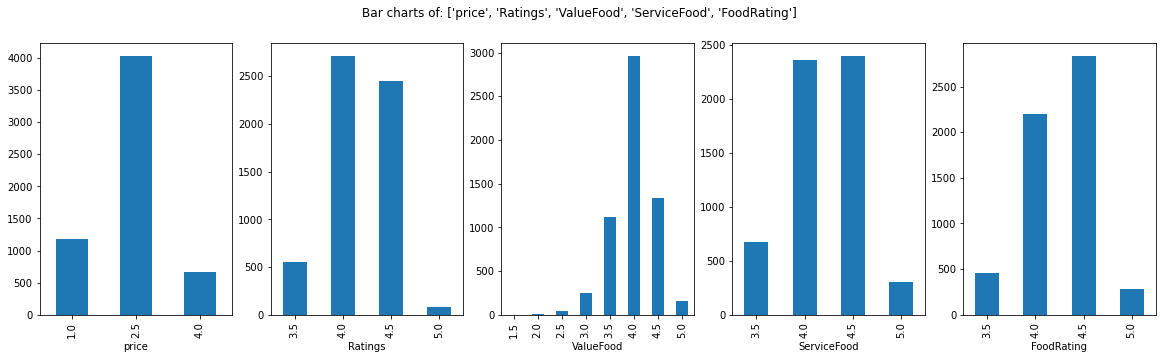

In [9]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])
PlotBarCharts(inpData=df, colsToPlot=[ 'price', 'Ratings','ValueFood','ServiceFood','FoodRating'])

<AxesSubplot:ylabel='ServiceFood'>

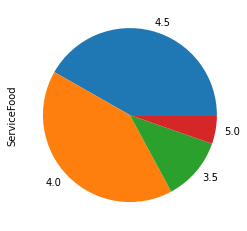

In [10]:
df["ServiceFood"].value_counts().plot(kind = 'pie')

<AxesSubplot:>

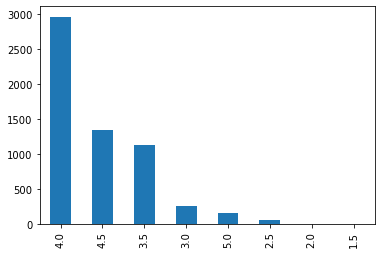

In [11]:
df["ValueFood"].value_counts().plot(kind = 'bar')

In [12]:
import seaborn as sns

In [14]:
df['Type'].value_counts()

 Bar              582
 Asian            409
 Pizza            328
 Mediterranean    317
 Steakhouse       243
                 ... 
 Uzbek              1
 Catalan            1
 New Zealand        1
 Portuguese         1
 Cambodian          1
Name: Type, Length: 92, dtype: int64

In [15]:
df['Origin'].value_counts()

American          1609
Italian            987
Japanese           378
Bar                265
Chinese            254
                  ... 
South American       1
Persian              1
Ethiopian            1
Georgian             1
Puerto Rican         1
Name: Origin, Length: 87, dtype: int64

In [16]:
df['Location'].value_counts()

Downtown Manhattan (Downtown)    1116
Midtown                           614
Midtown West                      436
Midtown East                      398
Upper East Side                   363
                                 ... 
0.1 miles from Times Square         1
Flatbush                            1
Sheepshead Bay                      1
Ridgewood                           1
Bergen Beach                        1
Name: Location, Length: 86, dtype: int64

In [37]:
df.dtypes

Name              object
Location          object
Vegetarian         int64
Gluten             int64
FoodRating       float64
ServiceFood      float64
ValueFood        float64
RankingInArea     object
Ratings          float64
CuisineCount       int64
NumOfReviews      object
price            float64
Origin            object
Type              object
dtype: object

In [35]:
df.isnull().sum()

Name                1
Location           31
Vegetarian          0
Gluten              0
FoodRating          0
ServiceFood         0
ValueFood          31
RankingInArea       0
Ratings             0
CuisineCount        0
NumOfReviews        0
price              32
Origin              0
Type             1491
dtype: int64

In [38]:
df

,Name,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,NumOfReviews,price,Origin,Type
0,Burger & Lobster,Midtown West,0,0,4.5,4.5,4.5,129,4.5,2,"1,078",2.5,American,Seafood
1,Club A Steakhouse,Flatiron District,0,1,4.5,4.5,4.5,1,4.5,2,"4,158",4.0,American,Steakhouse
2,Au Za'atar,Midtown East,0,0,4.5,4.0,4.0,2,4.5,2,247,2.5,Lebanese,Mediterranean
3,Boucherie Union Square,Downtown Manhattan (Downtown),0,1,4.5,4.5,4.0,3,4.5,2,"1,065",4.0,French,Steakhouse
4,Mei Jin Ramen,Flatiron District,0,0,4.5,4.5,4.5,4,4.5,2,173,2.5,Japanese,Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,Quality Meats,Greenwich Village,0,1,4.5,4.5,4.0,471,4.5,2,"2,377",4.0,American,Steakhouse
5910,Il Punto,East Harlem,0,0,4.5,4.5,4.0,45,4.5,2,"1,517",2.5,Italian,Mediterranean
5911,Smith & Wollensky,Morningside Heights,0,1,4.0,4.0,3.5,838,4.0,2,"3,285",4.0,American,Steakhouse
5912,Chocolat Restaurant & Bar,Upper West Side,0,0,4.0,3.5,3.5,"4,053",3.5,2,123,2.5,American,Barbecue


In [47]:
df.isnull().sum()

Name                1
Location           31
Vegetarian          0
Gluten              0
FoodRating          0
ServiceFood         0
ValueFood          31
RankingInArea       0
Ratings             0
CuisineCount        0
NumOfReviews        0
price              32
Origin              0
Type             1491
dtype: int64

In [49]:
datasetCopy=df.copy()
for c in datasetCopy.columns:
    labels=datasetCopy[c].astype('category').cat.categories.tolist()
    replace_map_c={c: {k:v for k,v in zip(labels,list(range(0,len(labels)+1)))}}
    datasetCopy.replace(replace_map_c,inplace = True)
datasetCopy = datasetCopy.dropna()
datasetCopy

,Name,Location,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,RankingInArea,Ratings,CuisineCount,NumOfReviews,price,Origin,Type
0,4622.0,58.0,0,0,5.0,5.0,6.0,743,5.0,1,20,1.0,4,71.0
1,1011.0,37.0,0,1,5.0,5.0,6.0,0,5.0,1,494,2.0,4,79.0
2,279.0,57.0,0,0,5.0,4.0,5.0,821,5.0,1,323,1.0,52,53.0
3,628.0,34.0,0,1,5.0,5.0,5.0,1342,5.0,1,17,2.0,34,79.0
4,2549.0,37.0,0,0,5.0,5.0,6.0,1704,5.0,1,210,1.0,49,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5909,4649.0,46.0,0,1,5.0,5.0,5.0,1965,5.0,1,259,2.0,4,79.0
5910,4637.0,35.0,0,0,5.0,5.0,5.0,1941,5.0,1,92,1.0,47,53.0
5911,4654.0,59.0,0,1,4.0,4.0,4.0,2508,4.0,1,380,2.0,4,79.0
5912,4623.0,81.0,0,0,4.0,3.0,4.0,1719,3.0,1,152,1.0,4,8.0


In [54]:
def get_highly_correlated_cols(df):
    tuple_arr = []
    correlations = []
    #print(type(tuple_arr))
    
    for i,_ in enumerate(df):    #enumerate
        for j,_ in enumerate(df):
            corr = df.iloc[:,i].corr(df.iloc[:,j], method='pearson')
            if i < j and corr > 0.5:
                tuple_arr.append((i,j))
                correlations.append(corr)
                
    return correlations,tuple_arr

In [60]:
df.corr()

,Vegetarian,Gluten,FoodRating,ServiceFood,ValueFood,Ratings,CuisineCount,price
Vegetarian,1.000000,0.007606,0.098776,0.063536,0.039715,0.072396,-0.297681,-0.018658
Gluten,0.007606,1.000000,0.060818,0.096664,-0.058914,0.072425,-0.092020,0.286756
FoodRating,0.098776,0.060818,1.000000,0.693599,0.663840,0.715504,0.047211,0.118265
ServiceFood,0.063536,0.096664,0.693599,1.000000,0.593641,0.693538,0.035341,0.198545
ValueFood,0.039715,-0.058914,0.663840,0.593641,1.000000,0.598582,0.092688,-0.230310
Ratings,0.072396,0.072425,0.715504,0.693538,0.598582,1.000000,0.050436,0.127708
CuisineCount,-0.297681,-0.092020,0.047211,0.035341,0.092688,0.050436,1.000000,-0.017461
price,-0.018658,0.286756,0.118265,0.198545,-0.230310,0.127708,-0.017461,1.000000
